# Дисбаланс амплітуд та зсув фази між каналами І та Q приймача FobosSDR другої ревізії

## Умови

- FobosSDR rev. 2
- модифікований драйвер https://github.com/fobos777/libfobos (заснований на офіційній версії v2.3.1); зібраний з
  ```c
  static const bool CALIBRATION_DEBUG_GAINS = true;
  static const bool CALIBRATION_DEBUG_SIGNAL = true;
  ```
- термінатори на обох HF входах;
- FM bandstop фільтр перед RF входом;
- SDRAngel v7.22.1-51-g6c617be7d Qt 6.7.2 64b x86_64 Fedora Linux 40 (Workstation Edition) (4k FFT, avg. type: Fix, avg. num. samples: 100).

## Метод

- процедура калібрування відповідно до http://argus.naapo.org/~rchilders/swe_argus_pubs/iqbal.pdf
- калібрування здійснюється сигналом LO міксера rffc5072 налаштованого з відступом +5 МГц від частоти LO max2830; преселектор вимкнений;
- частота дискретизації 50 МГц, центральна - 3 ГГц (на результат не впливає);
- вимірювання здійснені через не менше ніж 20 хвилин після встановлення значення підсилення, щоб дати приймачу досягти стаціонарного температурного режиму;
- 7 вимірювань на кожне значення підсилення.

## Вплив підсилення LNA (підсилення VGA 0 дБ)

### Приклади спектрів

| Значення підсилення |    Приклад спектру сигналу LO RFFC5072 після калібрування    |
|:-------------------:|:------------------------------------------------------------:|
|       Низьке        | 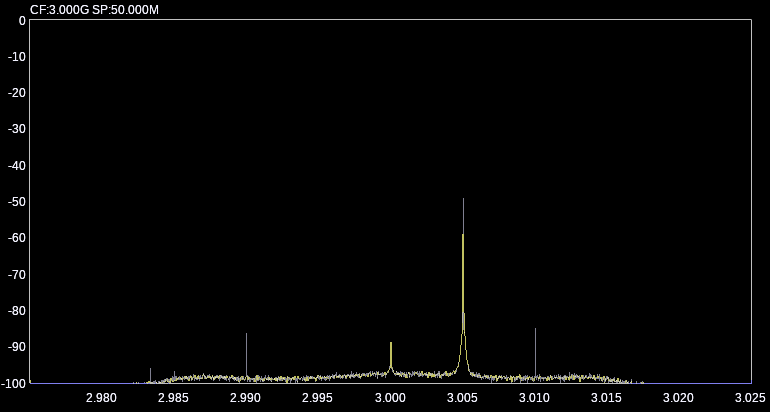 |
|       Середнє       | 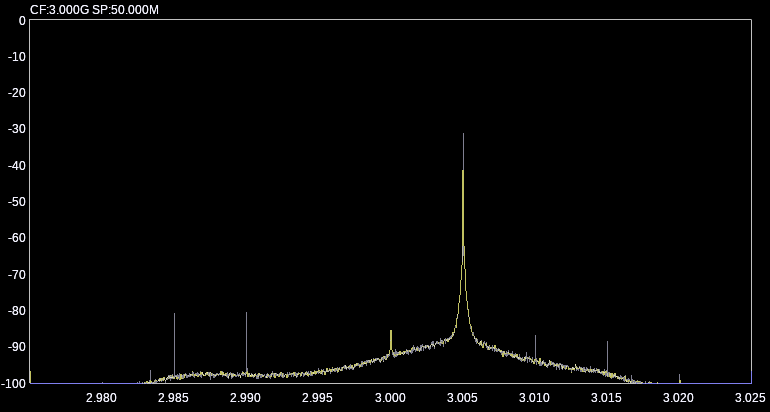 |
|       Високе        | 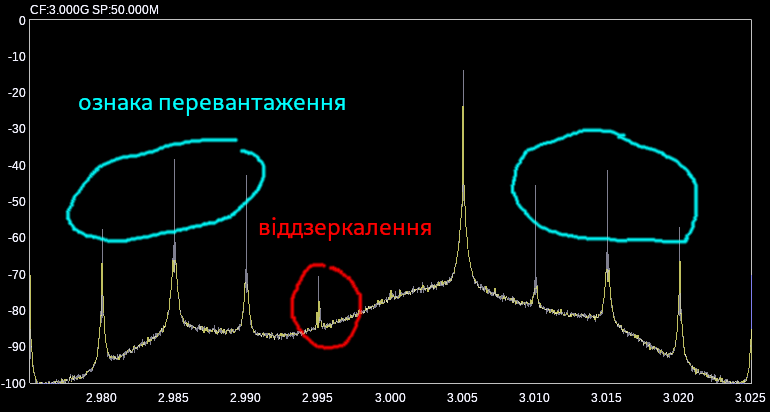 |

### Данні

In [1]:
import numpy as np
import pandas as pd

In [2]:

iq_ratio_vs_lna_gain = {
    "low": 1.0 / np.array([0.828288, 0.827659, 0.827625, 0.827079, 0.825775, 0.824789, 0.826124]),
    "medium": 1.0 / np.array([0.820859, 0.820455, 0.820289, 0.820612, 0.819975, 0.820943, 0.820074]),
    "high": 1.0 / np.array([0.942275, 0.941418, 0.941984, 0.943072, 0.942245, 0.941296, 0.941511]),
}

iq_phi_vs_lna_gain = {
    "low": np.rad2deg(np.arcsin(np.array([0.012154, 0.012369, 0.012014, 0.012111, 0.012674, 0.012847, 0.012424]))),
    "medium": np.rad2deg(np.arcsin(np.array([-0.011024, -0.011668, -0.010905, -0.011678, -0.011677, -0.010719, -0.009974]))),
    "high": np.rad2deg(np.arcsin(np.array([-0.035609, -0.037184, -0.037097, -0.037027, -0.037042, -0.035510,  -0.037000]))),
}

### Залежність співвідношення амплітуд I/Q від підсилення LNA

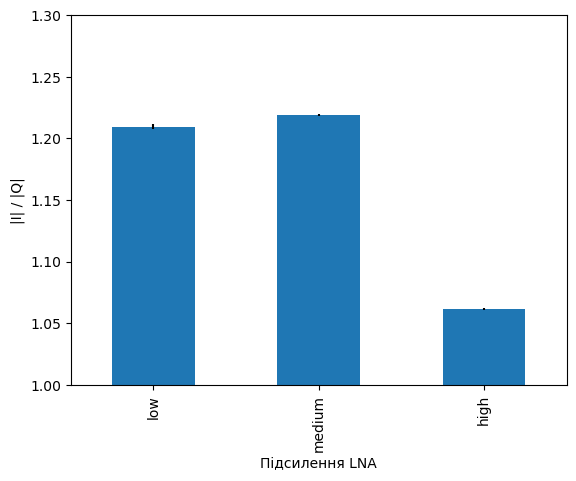

In [3]:
pd_iq_ratio_vs_lna_gain = pd.DataFrame.from_dict(iq_ratio_vs_lna_gain)
stds = pd_iq_ratio_vs_lna_gain.std(axis=0)
plot = pd_iq_ratio_vs_lna_gain.mean(axis=0).plot(kind='bar', ylabel="|I| / |Q|", xlabel="Підсилення LNA", ylim=(1.0, 1.3), yerr=stds)

### Залежність зсуву фази Q відносно І в залежності від підсилення LNA

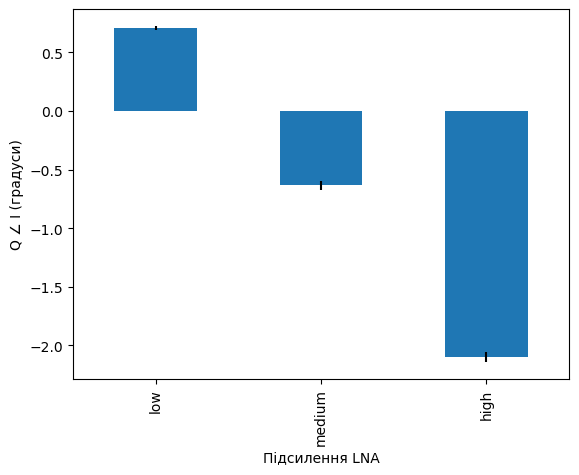

In [4]:
pd_iq_phi_vs_lna_gain= pd.DataFrame.from_dict(iq_phi_vs_lna_gain)
stds = pd_iq_phi_vs_lna_gain.std(axis=0)
plot = pd_iq_phi_vs_lna_gain.mean(axis=0).plot(kind='bar', ylabel="Q ∠ І (градуси)",  xlabel="Підсилення LNA", yerr=stds)